In [1]:
import pandas_datareader as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB 
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

In [2]:
start_date = "2010-11-01"
end_date =  "2020-11-01"

company_name = "AMZN" #Amazon

#Getting Stock market data from start_date to end_date of "Amazon"
df = pdr.get_data_yahoo(company_name, start_date,end_date )

In [3]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03,2518.000000
mean,890.681473,870.795627,881.336831,881.182176,4.313667e+06,881.182176
std,784.238880,764.220554,774.991907,774.472276,2.388177e+06,774.472276
min,160.850006,156.770004,157.839996,157.779999,8.813000e+05,157.779999
25%,272.039993,266.537498,269.797493,269.540001,2.769650e+06,269.540001
50%,555.619995,539.739990,547.005005,551.135010,3.708400e+06,551.135010
75%,1572.517487,1521.460022,1549.172485,1544.927551,5.094975e+06,1544.927551
max,3552.250000,3486.689941,3547.000000,3531.449951,2.413420e+07,3531.449951


In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-01,164.580002,161.520004,164.449997,162.580002,5239900,162.580002
2010-11-02,165.940002,163.360001,163.750000,164.610001,4260000,164.610001
2010-11-03,168.610001,162.289993,165.399994,168.470001,6112100,168.470001
2010-11-04,172.529999,168.399994,169.860001,168.929993,7395900,168.929993
2010-11-05,171.649994,168.589996,169.350006,170.770004,5212200,170.770004


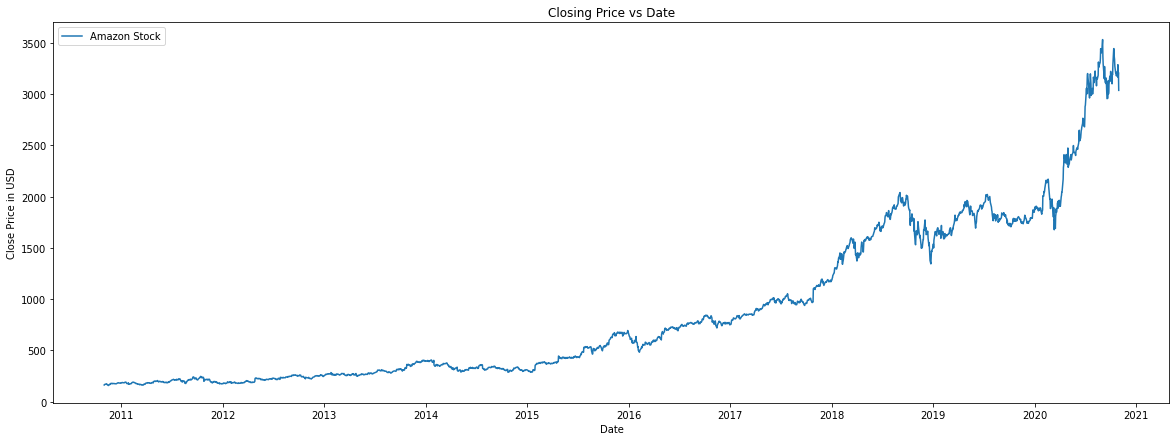

In [5]:
plt.figure(figsize=(20,7))
plt.plot(df["Close"],label="Amazon Stock")
plt.title("Closing Price vs Date")
plt.xlabel("Date")
plt.ylabel("Close Price in USD")
plt.legend()
plt.savefig("Closing Price vs Date.png",dpi=300)
plt.show()

In [6]:
# Calculating the difference in closing prices
df["Diff"] = df.Close.diff()

# calculating moving average of closing price over 2 days to smoothen the curve
df["SMA_2"] = df.Close.rolling(2).mean()

# calculating index
df["Force_Index"] = df["Close"] * df["Volume"]

# assigning lable y = 1 if stock price has increased and 0 otherwise
df["y"] = df["Diff"].apply(lambda x: 1 if x > 0 else -1).shift(-1)

#removing redundant columns and cleaning data
df = df.dropna()

In [7]:
# converting dataframe to numpy array
data = df.to_numpy()
# normalizing data
data = normalize(data)

In [8]:
#saperating normalized features
X = data[:,:-1]

# assinig lable values 
y = df["y"].values

#splitting in test and training set
X_train, X_test, y_train, y_test = train_test_split(
   X,
   y,
   test_size=0.064,
   shuffle=False,
)


In [9]:
#creating classifier
clf = BernoulliNB()

#training 
clf.fit(X_train,y_train)

#predicting based on X_test
y_pred = clf.predict(X_test)

#Calculating accuracy
print("Accuracy by using Bernoulli Naive Bayes classifier : " , accuracy_score(y_test, y_pred)*100 ,"%")

Accuracy by using Bernoulli Naive Bayes classifier :  59.25925925925925 %


In [10]:
#creating classifier
clf = GaussianNB()

#training 
clf.fit(X_train,y_train)

#predicting based on X_test
y_pred = clf.predict(X_test)

#Calculating accuracy
print("Accuracy by using Gaussian Naive Bayes classifier : " , accuracy_score(y_test, y_pred)*100 ,"%")

Accuracy by using Gaussian Naive Bayes classifier :  59.25925925925925 %


In [11]:
#creating classifier
clf = CategoricalNB()

#training 
clf.fit(X_train,y_train)

#predicting based on X_test
y_pred = clf.predict(X_test)

#Calculating accuracy
print("Accuracy by using Gaussian Naive Bayes classifier : " , accuracy_score(y_test, y_pred)*100 ,"%")

Accuracy by using Gaussian Naive Bayes classifier :  59.25925925925925 %
